### Imports necesarios:

In [35]:
import numpy as np  
from sklearn import metrics  
from sklearn.model_selection import cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

## 1. Introduccion
### En este cuaderno vamos a trabajar con los siguientes algoritmos:
* Regresión de Ridge
* ElasticNet
* Regresión Bayesiana
* Lasso
* Quantile Regression
### Para los siguientes datasets:
* Casas de Boston (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices?authuser=0)
* Redimiento de los alumnos (https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?authuser=0)

In [36]:
## Importamos los datasets
import kagglehub
from kagglehub import KaggleDatasetAdapter

# IMPORTACION HOUSING
housing_path = "Boston.csv"
# Cargar la última versión del dataset
dfhousing = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,  # Formato (Pandas)
  "willianleite/boston-housing-dataset",  # Nombre del dataset
  housing_path
)
# Mostrar las primeras 5 filas del dataset housing
display("DATASET HOUSING",dfhousing.head(5))

# IMPORTACION STUDENT
student_path = "StudentPerformanceFactors.csv"
# Cargar la última versión del dataset
dfstudent = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,  # Formato (Pandas)
  "lainguyn123/student-performance-factors",  # Nombre del dataset
  student_path
)
# Mostrar las primeras 5 filas del dataset student
display("DATASET STUDENT",dfstudent.head(5))

C:\Users\domid\AppData\Local\Temp\ipykernel_20004\4232616682.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfhousing = kagglehub.load_dataset(


'DATASET HOUSING'

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\domid\AppData\Local\Temp\ipykernel_20004\4232616682.py:19: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dfstudent = kagglehub.load_dataset(


'DATASET STUDENT'

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [37]:
# Borramos la primera columna que es el ID
dfhousing = dfhousing.drop('Unnamed: 0', axis = 1)

### Información Dataset Boston:
* **cim**: Crimen per cápita
* **zn**: Zona residencial
* **indus**: Zona industrial
* **chas**: Río Charles (0/1)
* **nox**: Contaminación NOX
* **rm**: Habitaciones promedio
* **age**: Viviendas antiguas
* **dis**: Distancia empleo
* **rad**: Acceso a carreteras
* **TAX**: Impuesto propiedad
* **ptratio**: Alumnos por maestro
* **black**: Índice población negra
* **lstat**: % población baja
* **medv**: Valor medio viviendas (Esta va a ser nuestra variable objetivo)

### Información Dataset Estudiantes:
* **Hours_Studied:** Horas de estudio
* **Attendance:** Asistencia (%)
* **Parental_Involvement:** Involucramiento parental
* **Access_to_Resources:** Acceso a recursos
* **Extracurricular_Activities:** Actividades extracurriculares
* **Sleep_Hours:** Horas de sueño
* **Previous_Scores:** Puntajes previos
* **Motivation_Level:** Nivel de motivación
* **Internet_Access:** Acceso a internet
* **Tutoring_Sessions:** Tutorías mensuales
* **Family_Income:** Ingreso familiar
* **Teacher_Quality:** Calidad docente
* **School_Type:** Tipo de escuela
* **Peer_Influence:** Influencia de pares
* **Physical_Activity:** Actividad física
* **Learning_Disabilities:** Dificultades de aprendizaje
* **Parental_Education_Level:** Educación parental
* **Distance_from_Home:** Distancia a la escuela
* **Gender:** Género
* **Exam_Score:** Puntaje final (Esta va a ser nuestra variable objetivo)

### Funciones para las métricas a utilizar:
* **MAE**: Promedio del error absoluto entre valores reales y predichos.
* **MSE**: Promedio de los errores elevados al cuadrado, penaliza grandes errores.
* **RMSE**: Raíz cuadrada del MSE, mide el error en la misma escala que los datos.
* **R²**: Proporción de varianza explicada por el modelo, indica su precisión.
* **R²** Ajustado: R² corregido por el número de variables, evita sobreajuste.
* **RMSLE**: Mide el error logarítmico, penaliza más las diferencias en valores bajos.
* **VC**: Promedio de la validación cruzada, mide la estabilidad del modelo.

In [38]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
      
    
    # Número de registros en el dataset
    n = X_test.shape[0]
    # Número de columnas en el dataset
    p = X_test.shape[1]
    
    
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    R2_AJUSTADO = 1-(1-R2)*(n-1)/(n-p-1)
    #RMSLE = metrics.mean_squared_log_error(y_test,y_pred)
    #cv son las iteraciones
    validacion_cruzada_errores = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    #obtenemos el promedio
    VC = validacion_cruzada_errores.mean()
    
    print('MAE:', round(MAE,4))
    print('MSE:', round(MSE,4))
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('R2 AJUSTADO:', round(R2_AJUSTADO,4))
    #print('RMSLE:', round(RMSLE, 4) ) se ha quitado esta formula porque daba error por escalar en el caso del dataset Boston, Tenemos otras métricas similares (MAE, MSE RMSE)
    print('VC:', round(VC, 4) )
    return MAE,MSE,RMSE,R2,R2_AJUSTADO,VC

## Dos metricas más para las pruebas:
* Mean Bias Deviation (MBD): El **Mean Bias Deviation (MBD)** mide el sesgo promedio de las predicciones con respecto a los valores reales.

$$
MBD = \frac{1}{n} \sum (y_{\text{pred}} - y_{\text{real}})
$$

**Interpretación:**  
- **MBD ≈ 0**: No hay sesgo en las predicciones.  
- **MBD > 0**: El modelo tiende a **sobreestimar** los valores reales.  
- **MBD < 0**: El modelo tiende a **subestimar** los valores reales.  

* Explained Variance Score (EVS): mide qué porcentaje de la varianza de los datos es explicada por el modelo.

$$
EVS = 1 - \frac{\text{Var}(y_{\text{real}} - y_{\text{pred}})}{\text{Var}(y_{\text{real}})}
$$

**Interpretación:**  
- **EVS = 1**: El modelo explica el **100%** de la variabilidad de los datos.  
- **EVS ≈ 0**: El modelo no explica la variabilidad (es como una predicción constante).  
- **EVS < 0**: El modelo es **peor que un modelo trivial** (muy mal ajuste).

In [39]:
def Metricas_Adicionales(y_test, y_pred):
    # Mean Bias Deviation (MBD)
    MBD = np.mean(y_pred - y_test)
    
    # Explained Variance Score (EVS)
    EVS = metrics.explained_variance_score(y_test, y_pred)

    # Mostrar resultados
    print('MBD:', round(MBD, 4))
    print('EVS:', round(EVS, 4))

    return MBD, EVS

### Funcion para la distribucion de las variables

In [40]:
# Comprobar distribuciones
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

## 1.1 Limpieza de los dataset
### trataremos los datos antes de aplicar los modelos en todos los datasets: 
* Limpiar datos
* Codificacion
* Escalado

### DATASET BOSTON

In [41]:
display("DATASET BOSTON",dfhousing.head(5))

'DATASET BOSTON'

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### A simple vista no se puede ver nada para limpiar en los datos ni codificar, solo que hay valores muy desescalados que habrá que escalar antes de aplicar cada algoritmo, está todo en numérico, vamos a ver si hay valores nulos:

In [42]:
dfhousing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [43]:
### miramos el schema por si son todos numéricos realmente
dfhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [44]:
dfhousing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Vamos a ver la distribucion de las variables para tenerlas en cuenta para el escalado

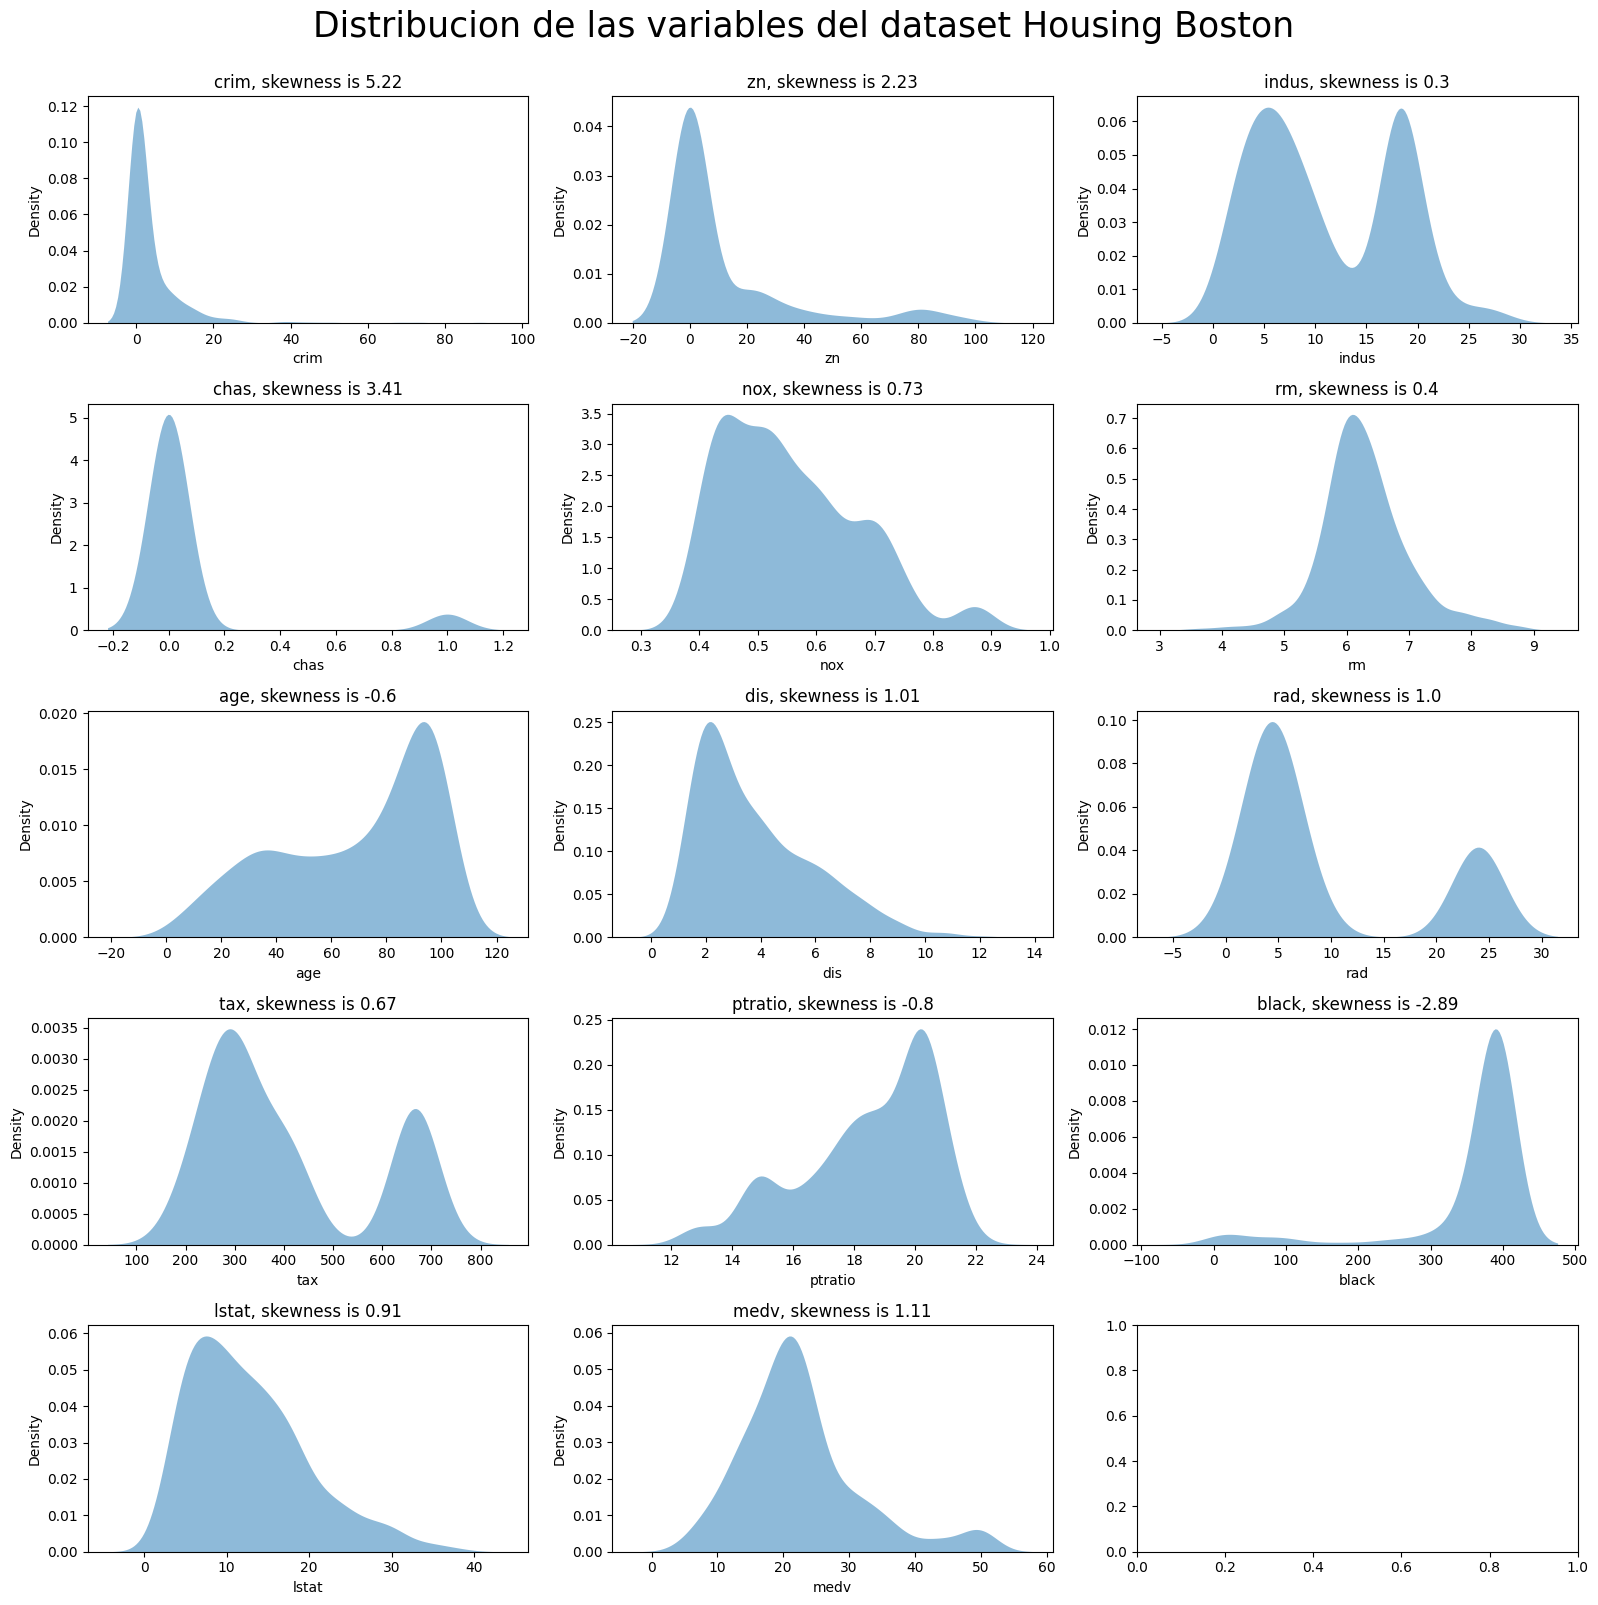

In [45]:
numeric_columns = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat", "medv"]
dist_custom(dfhousing, columns_list=numeric_columns, rows=5, cols=3, suptitle='Distribucion de las variables del dataset Housing Boston')
plt.tight_layout()

### Escalado variables (Conclusión de la distribución)

| Variable | Escalado         | Justificación                      |
|----------|-----------------|------------------------------------|
| crim     | RobustScaler    | Valores atípicos altos.     |
| zn       | MinMaxScaler    | Rango entre 0 y 100.              |
| indus    | StandardScaler  | Distribución casi normal.         |
| chas     | No escalar      | Variable binaria.                 |
| nox      | StandardScaler  | Distribución casi normal.         |
| rm       | StandardScaler  | Ligera asimetría, pero normal.    |
| age      | StandardScaler  | Distribución casi normal.         |
| dis      | RobustScaler    | Valores atípicos altos.           |
| rad      | RobustScaler    | Distribución muy sesgada.         |
| tax      | RobustScaler    | Valores atípicos y asimetría.     |
| ptratio  | StandardScaler  | Distribución casi normal.         |
| black    | MinMaxScaler    | Valores en un rango fijo.         |
| lstat    | StandardScaler  | Ligera asimetría, pero normal.    |
| medv     | No escalar      | Variable objetivo.                |

In [46]:
# Escaladores
scalers = {
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

# Columnas y escalador
scaling_dict = {
    "crim": "RobustScaler",
    "zn": "MinMaxScaler",
    "indus": "StandardScaler",
    "nox": "StandardScaler",
    "rm": "StandardScaler",
    "age": "StandardScaler",
    "dis": "RobustScaler",
    "rad": "RobustScaler",
    "tax": "RobustScaler",
    "ptratio": "StandardScaler",
    "black": "MinMaxScaler",
    "lstat": "StandardScaler"
}

# Aplicamos el escalado
scaled_features = {}
for col, scaler_name in scaling_dict.items():
    scaler = scalers[scaler_name]
    scaled_features[col] = scaler.fit_transform(dfhousing[[col]])

# Convertir a DataFrame escalado
dfhousing_escalao = dfhousing.copy()
for col in scaled_features:
    dfhousing_escalao[col] = scaled_features[col]

# Mostrar primeras filas
dfhousing_escalao.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.069593,0.18,-1.287909,0,-0.144217,0.413672,-0.120013,0.285777,-0.20,-0.087855,-1.459000,1.000000,-1.075562,24.0
1,-0.063755,0.00,-0.593381,0,-0.740262,0.194274,0.367166,0.569789,-0.15,-0.227390,-0.303094,1.000000,-0.492439,21.6
2,-0.063760,0.00,-0.593381,0,-0.740262,1.282714,-0.265812,0.569789,-0.15,-0.227390,-0.303094,0.989737,-1.208727,34.7
3,-0.062347,0.00,-1.306878,0,-0.835284,1.016303,-0.809889,0.924391,-0.10,-0.279070,0.113032,0.994276,-1.361517,33.4
4,-0.052144,0.00,-1.306878,0,-0.835284,1.228577,-0.511180,0.924391,-0.10,-0.279070,0.113032,1.000000,-1.026501,36.2


### DATASET ESTUDIANTES

In [47]:
display("DATASET STUDENT",dfstudent.head(5))

'DATASET STUDENT'

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 2. Regresión de Ridge

In [48]:
def train_evaluate_ridge(X, y, test_size=0.2, random_state=42):
    """
    Entrena y evalúa un modelo de regresión Ridge sin hiperparámetros adicionales.
    
    Retorna:
    - Modelo entrenado
    - X_train, X_test, y_train, y_test (para poder usarlos después)
    - y_pred (predicciones del modelo)
    """

    # Dividir en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Entrenar modelo Ridge con valores por defecto
    ridge = Ridge()
    ridge.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = ridge.predict(X_test)

    return ridge, X_train, X_test, y_train, y_test, y_pred

In [49]:
# Entrenar el modelo y obtener datos
ridge_model, X_train, X_test, y_train, y_test, y_pred = train_evaluate_ridge(dfhousing_escalao.drop(columns=['medv']), dfhousing_escalao['medv'])

# Evaluar con las métricas principales
Reg_Models_Evaluation_Metrics(ridge_model, X_train, y_train, X_test, y_test, y_pred)

# Evaluar con métricas adicionales
Metricas_Adicionales(y_test, y_pred)

MAE: 3.1902
MSE: 24.4555
RMSE: 4.9453
R2: 0.6665
R2 AJUSTADO: 0.6173
VC: 0.6992
MBD: -0.2464
EVS: 0.6673


(np.float64(-0.24640720152839615), 0.6673457947716217)

| **Métrica**               | **Valor**       | **Algoritmo**          | **Dataset**            |
|---------------------------|-----------------|------------------------|------------------------|
| **MAE**                   | 3.1902          | Regresión de Ridge      | Boston Housing         |
| **MSE**                   | 24.4555         | Regresión de Ridge      | Boston Housing         |
| **RMSE**                  | 4.9453          | Regresión de Ridge      | Boston Housing         |
| **R2**                    | 0.6665          | Regresión de Ridge      | Boston Housing         |
| **R2 Ajustado**           | 0.6173          | Regresión de Ridge      | Boston Housing         |
| **Validación Cruzada (VC)** | 0.6992         | Regresión de Ridge      | Boston Housing         |
| **MBD**                   | -0.2464         | Regresión de Ridge      | Boston Housing         |
| **EVS**                   | 0.6673          | Regresión de Ridge      | Boston Housing         |
| **Métrica**               | **Valor**       | **Algoritmo**          | **Dataset**            |
| **MAE**                   | 3.1902          | Regresión de Ridge      | Boston Housing         |
| **MSE**                   | 24.4555         | Regresión de Ridge      | Boston Housing         |
| **RMSE**                  | 4.9453          | Regresión de Ridge      | Boston Housing         |
| **R2**                    | 0.6665          | Regresión de Ridge      | Boston Housing         |
| **R2 Ajustado**           | 0.6173          | Regresión de Ridge      | Boston Housing         |
| **Validación Cruzada (VC)** | 0.6992         | Regresión de Ridge      | Boston Housing         |
| **MBD**                   | -0.2464         | Regresión de Ridge      | Boston Housing         |
| **EVS**                   | 0.6673          | Regresión de Ridge      | Boston Housing         |

## 2.1 Regresión de Ridge CON HIPERPARÁMETROS

## 2.2 Comparación SIN Hiperparámetros VS CON Hiperparámetros

## 3. ElesticNet

## 4. Regresión Bayesiana

## 5. Lasso

## 6. Quantile Regression